In [157]:
import pickle
import matplotlib.pyplot as plt
import imageio #read image
import cv2
import numpy as np
from skimage.util import random_noise
from skimage import filters

In [20]:
#open pickle var
def openFilePkl(path):
    with open(path, 'rb') as f:
        loaded = pickle.load(f, encoding="latin1") 
    return loaded

In [21]:
resModelMeta2 = openFilePkl('resultsModelMeta2.pickle')

In [22]:
print(resModelMeta2[0])

{'Name': '9RfE2-aTvaM.002.mp4', 'Accuracy per Trait': tensor([0.9510, 0.9534, 0.9997, 0.8703, 0.8338], device='cuda:0'), 'Accuracy Average': tensor(0.9217, device='cuda:0'), 'MSE per Trait:': tensor([2.3973e-03, 2.1714e-03, 8.4398e-08, 1.6811e-02, 2.7621e-02],
       device='cuda:0')}


In [23]:
#---------------------Data Augmentation Tests

In [24]:
image = imageio.imread('./_5ltHlmGvq8.000.mp4_15.jpg')

C:\Users\jessi\AppData\Local\Temp\ipykernel_2200\1342759480.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./_5ltHlmGvq8.000.mp4_15.jpg')


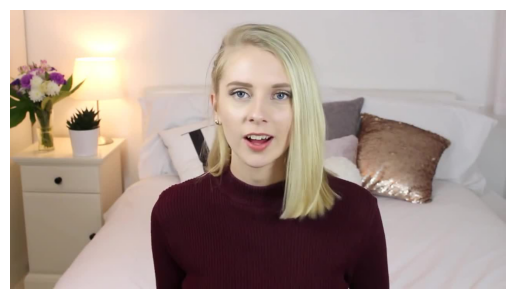

In [25]:
plt.imshow(image) # display the image
plt.axis('off')
plt.show()

In [26]:
#1. Experiment

In [27]:
print(image.shape)

(720, 1280, 3)


In [28]:
image = np.asarray(image)

In [29]:
black = np.zeros(image.shape)

In [30]:
black = np.float32(black)

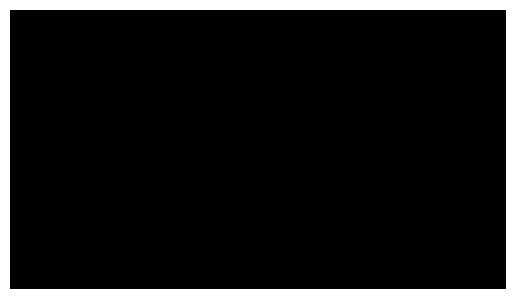

In [31]:
plt.imshow(black) # display the image
plt.axis('off')
plt.show()

In [32]:
print(image)

[[[240 206 181]
  [240 206 181]
  [240 206 181]
  ...
  [182 172 173]
  [181 171 172]
  [181 171 172]]

 [[240 206 181]
  [240 206 181]
  [240 206 181]
  ...
  [182 172 173]
  [181 171 172]
  [181 171 172]]

 [[240 206 181]
  [240 206 181]
  [240 206 181]
  ...
  [182 172 173]
  [181 171 172]
  [181 171 172]]

 ...

 [[119  95  71]
  [119  95  71]
  [119  95  71]
  ...
  [194 188 190]
  [194 188 190]
  [194 188 190]]

 [[120  96  72]
  [120  96  72]
  [120  96  72]
  ...
  [194 188 190]
  [194 188 190]
  [194 188 190]]

 [[120  96  72]
  [120  96  72]
  [120  96  72]
  ...
  [194 188 190]
  [194 188 190]
  [194 188 190]]]


In [49]:
img = image / 255

In [50]:
print(img)

[[[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71372549 0.6745098  0.67843137]
  [0.70980392 0.67058824 0.6745098 ]
  [0.70980392 0.67058824 0.6745098 ]]

 [[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71372549 0.6745098  0.67843137]
  [0.70980392 0.67058824 0.6745098 ]
  [0.70980392 0.67058824 0.6745098 ]]

 [[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71372549 0.6745098  0.67843137]
  [0.70980392 0.67058824 0.6745098 ]
  [0.70980392 0.67058824 0.6745098 ]]

 ...

 [[0.46666667 0.37254902 0.27843137]
  [0.46666667 0.37254902 0.27843137]
  [0.46666667 0.37254902 0.27843137]
  ...
  [0.76078431 0.7372549  0.74509804]
  [0.76078431 0.7372549  0.74509804]
  [0.76078431 0.7372549  0.74509804]]

 [[0.47058824 0.37647059 0.28235294]
  [0.47058824 0.37647059 0.28235294]


In [116]:
img_gaussian = random_noise(img, mode='gaussian', seed=True, clip=True, var=0.1)

In [117]:
img_gaussian = np.clip(img_gaussian, 0, 1)

In [118]:
print(img_gaussian)

[[[1.         1.         0.8142973 ]
  [0.52908197 1.         0.85095996]
  [0.77137695 0.99160882 0.82509184]
  ...
  [0.63115966 0.64345027 1.        ]
  [0.57045908 0.67775461 1.        ]
  [1.         0.51313992 1.        ]]

 [[1.         1.         0.90118912]
  [1.         0.57303965 1.        ]
  [0.71951073 0.8321536  1.        ]
  ...
  [0.82486306 0.98672915 0.2154185 ]
  [0.08225723 1.         0.57028746]
  [0.14016474 0.98980825 0.98896583]]

 [[1.         0.74996772 0.36477395]
  [0.3692565  1.         0.82928481]
  [0.43658606 0.47248845 0.40489193]
  ...
  [0.93740423 0.47889058 0.        ]
  [0.64611528 0.87742692 0.70383624]
  [0.81105066 0.49604734 0.47816694]]

 ...

 [[0.47097995 0.5466824  0.05655424]
  [0.45830809 0.59245548 0.67852618]
  [0.2365139  0.20914522 0.        ]
  ...
  [0.41418957 0.52528014 0.82434521]
  [1.         0.67272471 0.37337752]
  [1.         0.64826254 0.54686364]]

 [[0.53317053 0.10291019 0.28361317]
  [0.07004661 0.73426029 0.4892239 ]


In [119]:
img_back = img_gaussian * 255

In [120]:
print(img_back)

[[[255.         255.         207.64581149]
  [134.91590247 255.         216.99478863]
  [196.70112187 252.86024837 210.39841817]
  ...
  [160.94571338 164.07981939 255.        ]
  [145.4670661  172.82742633 255.        ]
  [255.         130.85067954 255.        ]]

 [[255.         255.         229.80322493]
  [255.         146.12511065 255.        ]
  [183.47523705 212.19916696 255.        ]
  ...
  [210.34007917 251.61593316  54.93171675]
  [ 20.97559425 255.         145.42330115]
  [ 35.74200746 252.40110437 252.18628548]]

 [[255.         191.24176802  93.01735751]
  [ 94.1604064  255.         211.46762564]
  [111.32944539 120.48455459 103.24744243]
  ...
  [239.03807885 122.11709872   0.        ]
  [164.7593952  223.74386564 179.47824215]
  [206.81791911 126.49207213 121.93257096]]

 ...

 [[120.09988747 139.40401311  14.42133042]
  [116.86856201 151.07614824 173.02417476]
  [ 60.31104339  53.33203211   0.        ]
  ...
  [105.61833911 133.94643501 210.20802779]
  [255.         17

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


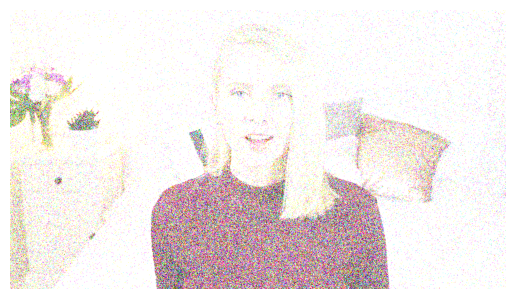

In [121]:
plt.imshow(img_back) # display the image
plt.axis('off')
plt.show()

In [153]:
img_salt_pepper = random_noise(img, mode='s&p', seed=True, clip=True, salt_vs_pepper=0.5, amount=0.1) #salt_vs_pepper: equal distribution salt and pepper, 

In [154]:
img_salt_pepper = np.clip(img_salt_pepper, 0, 1)

In [155]:
print(img_salt_pepper)

[[[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71372549 0.6745098  0.67843137]
  [0.70980392 1.         0.6745098 ]
  [0.70980392 0.67058824 0.6745098 ]]

 [[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71372549 0.6745098  0.        ]
  [0.70980392 0.67058824 0.6745098 ]
  [0.70980392 0.67058824 0.6745098 ]]

 [[0.94117647 0.         0.70980392]
  [0.94117647 0.80784314 0.        ]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.         0.6745098  0.67843137]
  [0.70980392 0.67058824 0.6745098 ]
  [1.         0.67058824 0.6745098 ]]

 ...

 [[0.46666667 0.37254902 0.27843137]
  [0.46666667 0.37254902 0.27843137]
  [0.         0.37254902 0.27843137]
  ...
  [0.76078431 0.7372549  0.74509804]
  [0.76078431 0.7372549  0.74509804]
  [0.76078431 0.7372549  0.74509804]]

 [[0.47058824 0.37647059 0.28235294]
  [0.47058824 0.37647059 0.28235294]


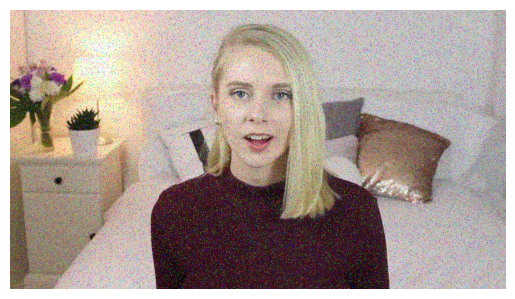

In [156]:
plt.imshow(img_salt_pepper) # display the image
plt.axis('off')
plt.show()

In [211]:
blur = filters.gaussian(img, sigma=1.5, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=-1)

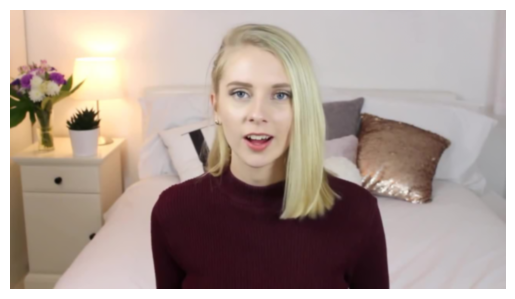

In [212]:
plt.imshow(blur) # display the image
plt.axis('off')
plt.show()

In [213]:
blur2 = filters.gaussian(img, sigma=5, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=-1)

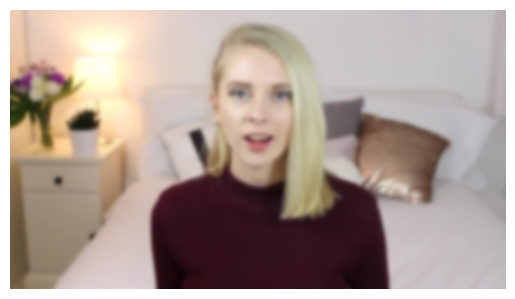

In [214]:
plt.imshow(blur2) # display the image
plt.axis('off')
plt.show()

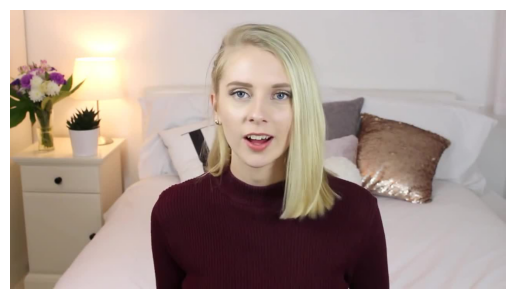

In [198]:
plt.imshow(image) # display the image
plt.axis('off')
plt.show()

In [199]:
print(blur)

[[[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71393535 0.67471966 0.67864123]
  [0.71188588 0.6726702  0.67659177]
  [0.7105881  0.67137242 0.67529398]]

 [[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71393535 0.67471966 0.67864123]
  [0.71188588 0.6726702  0.67659177]
  [0.7105881  0.67137242 0.67529398]]

 [[0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  [0.94117647 0.80784314 0.70980392]
  ...
  [0.71393568 0.67471999 0.67864156]
  [0.7118864  0.67267071 0.67659228]
  [0.71058873 0.67137305 0.67529461]]

 ...

 [[0.46645814 0.37234049 0.27822285]
  [0.46645802 0.37234038 0.27822273]
  [0.46645812 0.37234048 0.27822283]
  ...
  [0.76078606 0.73725665 0.74509979]
  [0.76078536 0.73725595 0.74509909]
  [0.76078536 0.73725595 0.74509909]]

 [[0.46850627 0.37438863 0.28027098]
  [0.46850627 0.37438863 0.28027098]
